In [1]:
import  cv2
import numpy as np

Image stored as Multidimensional array
Image is loaded in BGR format\n


as numpy.array((no.of pixles in column,no. of pixels in row,channels),np.uint8)

In [2]:
m=np.ones([4,5,3],np.uint8)
print(m)

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [3]:
Image=cv2.imread("C:/Users/hp/handson-ml/balls1.jpg")
print(Image[0][0],"\n")
# print(Image[0][0],"\n")
# print(Image[0],"\n")
# print(Image[:,0])


# print(Image)

[255 255 255] 



COLOR MODELS

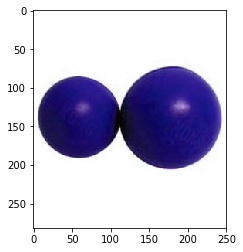

In [6]:
from matplotlib import pyplot as plt

plt.imshow(Image)


COLOR MODEL CONVERSION

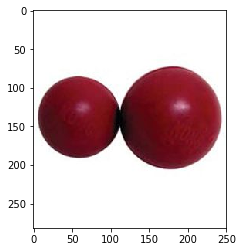

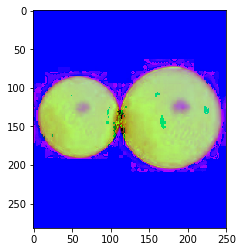

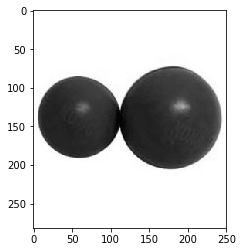

<function matplotlib.pyplot.show(*args, **kw)>

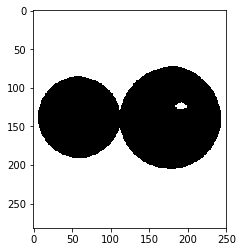

In [7]:
RGB=cv2.cvtColor(Image,cv2.COLOR_BGR2RGB)
plt.imshow(RGB)
plt.show()

HSV=cv2.cvtColor(Image,cv2.COLOR_BGR2HSV)
plt.imshow(HSV)
plt.show()

Gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
plt.imshow(Gray,cmap='gray')#Single channel color model
plt.show()


(thresh, binary) = cv2.threshold(Gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary,cmap='gray')
plt.show

SCALING

cv2.resize(img,size,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)


fx,fy are the scale factors ,
size is the desired size of the output ,
interpolation is the resizing methods 

In [8]:
dim=Image.shape
print(dim)
cols,rows=dim[0],dim[1]
im1=cv2.resize(Image,None,fx=2,fy=1,interpolation=cv2.INTER_CUBIC)
print(im1.shape)
#fx,fy are scale 
cv2.imshow("FrameOriginal",Image)
cv2.imshow("Framename1",im1)
cv2.waitKey(0)
cv2.destroyAllWindows()

(282, 250, 3)
(282, 500, 3)


TRANSLATION

(Shifting an object's location )

To shift an object at any object to location (x,y) a numpy array of type float32 is created.                         
                        

In [9]:
M=np.float32([[1,0,30],[0,1,30]])
translated_image=cv2.warpAffine(Image,M,(cols,rows))
cv2.imshow("Translation",translated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ROTATION

Rotate the image at any point (x,y) and at any angle with a given factor of scaling

In [23]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
Rotated_image = cv2.warpAffine(Image,M,(cols,rows))
cv2.imshow("Rotation",Rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


BLURRING AND SHARPENING

In [20]:
Blurred= cv2.GaussianBlur(Image, (7,7), 0) 
cv2.imshow('Gaussian Blurring', Blurred) 
cv2.imshow('Original',Image)



Sharpened=cv2.addWeighted(Image,3,Blurred,-2,0)
# Sharpened=cv2.addWeighted(Image,1,Blurred,-1,0)
cv2.imshow('Sharpening',Sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

EDGE DETECTION

Canny Edge Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


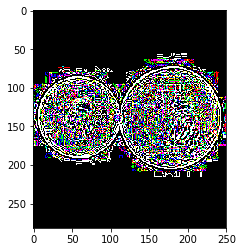

In [24]:

gradients=cv2.Laplacian(Image,cv2.CV_64F)
plt.imshow(gradients)
plt.savefig("C:/Users/hp/handson-ml/Gradients.png")
plt.show()



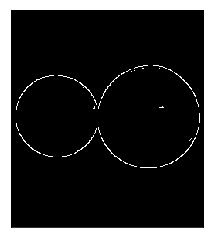

In [25]:
Edges=cv2.Canny(Image,200,200)
plt.imshow(Edges,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

COLOR DETECTION

In [26]:
#To create a mask
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(HSV, lower_red, upper_red)



lower_red1 = np.array([170,120,70])
upper_red1 = np.array([180,255,255])
mask2 = cv2.inRange(HSV,lower_red1,upper_red1)

lower_green = np.array([110,91,33])
upper_green = np.array([111,97,69])
maskg1 = cv2.inRange(HSV, lower_green, upper_green)

lower_green1 = np.array([36, 25, 25])
upper_green1 = np.array([70, 255,255])
maskg2 = cv2.inRange(HSV,lower_green1,upper_green1)


mask1 = mask1+mask2

maskg1 = maskg1+maskg2

In [31]:
#Apply the mask on ball Image
img_BGR=cv2.bitwise_and(Image,Image,mask=mask1)
cv2.imshow("RED COLOR Mask of image",mask1)
cv2.imshow("RedDetected on BGR image",img_BGR)
# img_RGB=cv2.bitwise_and(RGB,RGB,mask=mask1)
# cv2.imshow("RedDetected on RGB image",img_RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
#DILATION
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(mask1,kernel,iterations = 5)

#EROSION
erosion = cv2.erode(mask1,kernel,iterations = 5)


closing = cv2.morphologyEx(mask1, cv2.MORPH_CLOSE, kernel) #Dilation followed by erosion

opening= cv2.morphologyEx(mask1, cv2.MORPH_OPEN, kernel)

cv2.imshow("Original Mask",mask1)
cv2.imshow("Dilated Mask",dilation)
cv2.imshow("Erosion Mask",erosion)
cv2.imshow("closing Mask",closing)
cv2.imshow("OPEN Mask",opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
img_BGR_masked=cv2.bitwise_and(Image,Image,mask=closing)
cv2.imshow("closing Masked Image",img_BGR_masked)
cv2.imshow("RED COLOR DETECTED on BGR image",img_BGR)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [34]:
cap=cv2.VideoCapture(0)


while True:
    ret,frames=cap.read()
    frs=cv2.resize(frames,(800,700))
    if ret == True:
        frames_hsv=cv2.cvtColor(frs,cv2.COLOR_BGR2HSV)
        f_mask2 = cv2.inRange(frames_hsv, lower_red1, upper_red1)
        f_mask1 = cv2.inRange(frames_hsv,lower_green1,upper_green1)
        
        f_mask1=f_mask1+f_mask2
        f_mask=cv2.morphologyEx(f_mask1,cv2.MORPH_CLOSE,np.ones((10,10)))
        f_mask11=cv2.resize(f_mask,(800,700))
        
        detection=cv2.bitwise_and(frs,frs,mask=f_mask11)
     
        cv2.imshow("color Detection",detection)
    
        key=cv2.waitKey(1)
        if key & 0xFF == ord('q'):
            break
    
   
        
cap.release()
cv2.destroyAllWindows()
    
    

In [ ]:
SEGMENTATION 

In [35]:
cap=cv2.VideoCapture(0)

background=0

#Camera is just satrting so parameters are not stable yet, so multipule frames have to be captured 
for i in range(30):
    ret,background=cap.read()

background1=cv2.resize(background,(800,900))
cap.release()

In [36]:
cap2 =cv2.VideoCapture(0)

while True:
    ret,picture=cap2.read()
    pic=cv2.resize(picture,(800,900))
    pic_hsv=cv2.cvtColor(picture,cv2.COLOR_BGR2HSV)
    
#     lower_red = np.array([0,120,70])
#     upper_red = np.array([10,255,255])
#     mask1 = cv2.inRange(pic_hsv, lower_red, upper_red)

    lower_red1 = np.array([170,120,70])
    upper_red1 = np.array([180,255,255])
    masks2 = cv2.inRange(pic_hsv,lower_green1,upper_green1)

    # Threshold the HSV image to get only white colors
#     masks = mask1+mask2
    
#     mask1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
#     mask11 = cv2.morphologyEx(mask1, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))
    
    mask2=cv2.morphologyEx(masks2,cv2.MORPH_CLOSE,np.ones((10,10),np.uint8))
    
    mask21=cv2.bitwise_not(mask2)
    mask112=cv2.resize(mask21,(800,900))
    cv2.imshow('NOTmaskRED',mask112)
    
    mask111=cv2.resize(mask2,(800,900))
    cv2.imshow('maskRED',mask111)
    seg1=cv2.bitwise_and(pic,pic,mask=mask112)
    
    seg2=cv2.bitwise_and(background1,background1,mask=mask111)
    
    final_output = cv2.addWeighted(seg1,1,seg2,1,0) #Add both matrices with weight 1 and  extra weight 0
    
    cv2.imshow("magic",final_output)
    
    key=cv2.waitKey(1)
    if key & 0xFF == ord('q'):
        break
        
cap2.release()
cv2.destroyAllWindows()

PLOTTING HISTOGRAM OF ANY IMAGE

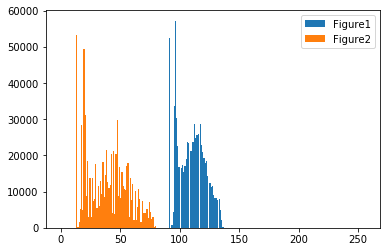

In [4]:
import cv2
from matplotlib import pyplot as plt

figure1=cv2.imread("C:/Users/hp/handson-ml/Figure1.tif")
figure2=cv2.imread("C:/Users/hp/handson-ml/Figure2.tif")
plt.hist(figure1.ravel(),256,[0,256],label='Figure1')
plt.hist(figure2.ravel(),256,[0,256],label='Figure2')
plt.legend()
plt.savefig('C:/Users/hp/handson-ml/Figure_1Figure2_histplot.png')
plt.show()



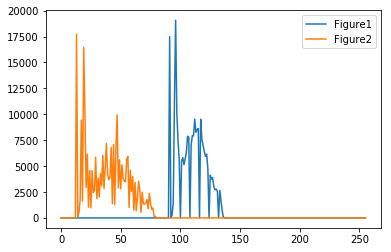

In [44]:
#Histogram Using OpenCV

Hist1=cv2.calcHist([figure1],[0],None,[256],[0,256])
Hist2=cv2.calcHist([figure2],[0],None,[256],[0,256])
plt.plot(Hist1,label='Figure1')
plt.plot(Hist2,label='Figure2')
plt.legend()
plt.show()

HISTOGRAM OF IMAGE DETECTION


Figure1=cv2.cvtColor(figure1,cv2.COLOR_BGR2GRAY)
Figure2=cv2.cvtColor(figure2,cv2.COLOR_BGR2GRAY)

HE1=cv2.equalizeHist(Figure1)
plot1=np.hstack((Figure1,HE1))
HE2=cv2.equalizeHist(Figure2)
plot2=np.hstack((Figure2,HE2))

cv2.imwrite('C:/Users/hp/handson-ml/Figure1HE.png',plot1)
cv2.imwrite('C:/Users/hp/handson-ml/Figure2HE.png',plot2)

Rice detection by white color masking

In [37]:
import cv2
import numpy as np
rice=cv2.imread("C:/Users/hp/handson-ml/Figure3.tif")
rice_hsv=cv2.cvtColor(rice,cv2.COLOR_BGR2HSV)
lower_white=np.array([0,0,135])
upper_white=np.array([50,60,255])
mask_rice=cv2.inRange(rice_hsv,lower_white,upper_white)
rice_detection=cv2.bitwise_and(rice,rice,mask=mask_rice)

cv2.imshow("Rice Mask",mask_rice)
cv2.imshow("RiceDetection",rice_detection)
cv2.imwrite("C:/Users/hp/handson-ml/Figure3Detection.png",np.hstack((rice,rice_detection)))
cv2.waitKey(0)
cv2.destroyAllWindows()

GRADIENT DETECTION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


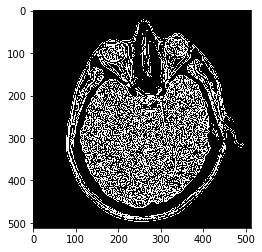

In [35]:

Figure4=cv2.imread("C:/Users/hp/handson-ml/Figure4.tif")
gradients=cv2.Laplacian(Figure4,cv2.CV_64F)
plt.imshow(gradients)
plt.savefig("C:/Users/hp/handson-ml/Gradients.png")
plt.show()



OBJECT DETECTION

In [3]:
import cvlib as cv
from cvlib.object_detection import draw_bbox

bbox, label, conf = cv.detect_common_objects(Image)

output_image = draw_bbox(Image, bbox, label, conf)

C:\Users\hp\Anaconda3\envs\mlbook\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
cv2.imshow("Object Detection",output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

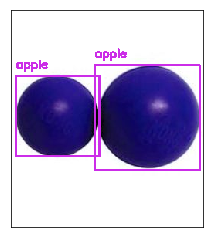

In [10]:
from matplotlib import pyplot as plt
plt.imshow(output_image)
plt.xticks([])
plt.yticks([])
plt.savefig("C:/Users/hp/handson-ml/object_detection.jpg")